# Teste Z

Vamos analisar dados do ENEM 2019 para investigar se a proporção de mulheres com mais de 20 anos de idade é significativamente maior do que 50%. Para isso, utilizaremos um teste estatístico poderoso: o teste z de uma proporção. Esse teste nos permite comparar a proporção amostral de mulheres com mais de 20 anos com uma proporção populacional predefinida (neste caso, 50%).

---


**Hipótese Nula (H0): a proporção de mulheres com mais de 20 anos na população é de 50%.**

**Hipótese Alternativa (H1): a proporção de mulheres com mais de 20 anos na população é maior que 50%.**


---


O teste z de uma proporção calcula a estatística z, que mede a diferença entre a proporção amostral e a proporção populacional, levando em conta o tamanho da amostra. O valor p do teste indica a probabilidade de observar os resultados obtidos se a hipótese nula fosse verdadeira.

Além do cálculo estatístico, iremos construir um gráfico da distribuição normal padrão para visualizar a estatística z calculada e a área correspondente ao valor p. Essa representação gráfica nos auxiliará na interpretação dos resultados do teste e na visualização da probabilidade associada à hipótese nula.

Com este teste, esperamos obter insights sobre a composição demográfica das mulheres que participaram do ENEM 2019, utilizando o teste z como ferramenta para analisar se a proporção de mulheres com mais de 20 anos diverge significativamente da expectativa de 50%.

In [63]:
import pandas as pd  # Importa a biblioteca pandas para manipulação de dados em formato tabular (DataFrames).
from statsmodels.stats.proportion import proportions_ztest  # Importa a função proportions_ztest do módulo statsmodels.stats.proportion para realizar o teste z de uma proporção.
from scipy.stats import norm  # Importa a distribuição normal da biblioteca scipy.stats para plotar o gráfico da distribuição normal.
import numpy as np  # Importa a biblioteca numpy para operações numéricas e criação de arrays.
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib.pyplot para plotar gráficos.

---
# Explicação:

---
* **import pandas as pd**: Importa a biblioteca pandas, que é essencial para manipular e analisar dados em formato tabular (como tabelas). Ela fornece ferramentas para ler arquivos, filtrar dados, calcular estatísticas e muito mais.
* **from statsmodels.stats.proportion import proportions_ztest**: Importa a função proportions_ztest do módulo statsmodels.stats.proportion, que realiza o teste z de uma proporção. Esse teste é usado para comparar a proporção de uma amostra com uma proporção populacional conhecida.
* **from scipy.stats import norm**: Importa a distribuição normal da biblioteca scipy.stats. Essa distribuição é usada para criar o gráfico da distribuição normal, que é uma representação visual do teste z.
* **import numpy as np**: Importa a biblioteca numpy, que é fundamental para cálculos numéricos e operações com arrays multidimensionais (matrizes).
* **import matplotlib.pyplot as plt**: Importa a biblioteca matplotlib.pyplot, que é usada para criar gráficos de diferentes tipos.

In [64]:
# 1. Carregar a tabela de dados
data = pd.read_csv('enem_2019.csv')  # Lê a tabela de dados do arquivo CSV "enem_2019.csv" e a armazena no DataFrame data.

---
# Explicação:

---
* **data = pd.read_csv('enem_2019.csv')**: Lê os dados do arquivo CSV "enem_2019.csv" e os armazena em um DataFrame do Pandas chamado data. Essa é a primeira etapa para carregar os dados que serão analisados.

In [65]:
# 2. Filtrar as mulheres
df_mulheres = data[data["sexo"] == "F"][["idade", "sexo"]]  # Cria um novo DataFrame df_mulheres contendo apenas as linhas do DataFrame original (data) onde o sexo é "F" (feminino) e seleciona as colunas "idade" e "sexo".
df_mulheres

,idade,sexo
1,16,F
2,18,F
6,30,F
7,26,F
9,17,F
...,...,...
4488344,43,F
4488346,17,F
4488347,23,F
4488348,21,F


---
# Explicação:

---
* **df_mulheres = data[data["sexo"] == "F"][["idade", "sexo"]]**: Cria um novo DataFrame chamado df_mulheres que contém apenas as linhas do DataFrame original (data) onde a coluna "sexo" é igual a "F" (feminino). A expressão [["idade", "sexo"]] seleciona as colunas "idade" e "sexo" do DataFrame original para o novo DataFrame df_mulheres.

In [66]:
# 3. Contar as mulheres com idade maior que 20 anos
x = len(df_mulheres[df_mulheres["idade"] > 20])  # Calcula o número de mulheres no DataFrame df_mulheres com idade maior que 20 anos e armazena esse número em x.
x

992223

---
# Explicação:

---
* **x = len(df_mulheres[df_mulheres["idade"] > 20])**: Calcula o número de mulheres no DataFrame df_mulheres que têm idade maior que 20 anos. A expressão df_mulheres["idade"] > 20 cria uma máscara booleana que identifica as linhas onde a idade é maior que 20. A função len() conta o número de linhas que atendem a essa condição, e o resultado é armazenado na variável x.

In [67]:
# 4. Contar o número total de mulheres
n = len(df_mulheres)  # Calcula o número total de mulheres no DataFrame df_mulheres e armazena esse número em n.
n

2712847

---
# Explicação:

---
* **n = len(df_mulheres)**: Calcula o número total de mulheres no DataFrame df_mulheres e armazena o resultado na variável n.

In [68]:
# 5. Definir a hipótese nula e a proporção populacional
p0 = 0.5  # Proporção populacional sob a hipótese nula (50%).

---
# Explicação:

---
* **p0 = 0.5**: Define a proporção populacional sob a hipótese nula, que é 50%. Isso significa que estamos assumindo inicialmente que 50% das mulheres na população têm mais de 20 anos.

In [69]:
# 6. Executar o teste z
stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger')  # Realiza o teste z de uma proporção:
    # count=x: Fornece o número de mulheres com mais de 20 anos (calculado em x).
    # nobs=n: Fornece o número total de mulheres (calculado em n).
    # value=p0: Fornece a proporção populacional sob a hipótese nula (0.5).
    # alternative='larger': Indica que estamos testando se a proporção real é maior do que a proporção da hipótese nula.
    # As variáveis stat (estatística z) e p_value (valor p) são armazenadas para uso posterior.
print(f"Estatística z: {stat}")
print(f"Valor p: {p_value}")

Estatística z: -459.09816305596917
Valor p: 1.0


---
# Explicação:

---
* **stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger'): Realiza o teste z de uma proporção usando a função proportions_ztest.**
 * **count=x**: Fornece o número de mulheres com mais de 20 anos (x) para o teste.
 * **nobs=n**: Fornece o número total de mulheres (n) para o teste.
 * **value=p0**: Fornece a proporção populacional sob a hipótese nula (0.5) para o teste.
 * **alternative='larger'**: Especifica que estamos testando se a proporção real é maior do que a proporção da hipótese nula.
 * **O teste retorna dois valores**: a estatística z (stat) e o valor p (p_value).

In [70]:
# 7. Definir o nível de significância
nivel_significancia = 0.05  # Define o nível de significância, que é o limite para rejeitar a hipótese nula.

# 8. Imprimir os resultados
print(f"Estatística z: {stat}")  # Imprime a estatística z do teste.
print(f"Valor p: {p_value}")  # Imprime o valor p do teste.

Estatística z: -459.09816305596917
Valor p: 1.0


---
# Explicação:

---
* **nivel_significancia = 0.05**: Define o nível de significância, que é o limite para rejeitar a hipótese nula. Um nível de significância de 0.05 significa que há uma chance de 5% de rejeitar a hipótese nula quando ela é realmente verdadeira.

* **print(f"Estatística z: {stat}")**: Imprime a estatística z calculada pelo teste.
* **print(f"Valor p: {p_value}")**: Imprime o valor p calculado pelo teste.

In [71]:
# 9. Decisão
if p_value < nivel_significancia:  # Compara o valor p com o nível de significância:
    print("Rejeitamos a hipótese nula. A proporção de mulheres com idade maior que 20 anos é maior que 50%.")  # Se p_value < nivel_significancia, rejeitamos a hipótese nula.
else:  # Se p_value >= nivel_significancia, não rejeitamos a hipótese nula.
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.")

Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.


---
# Explicação:

---
* **if p_value < nivel_significancia:**: Verifica se o valor p é menor que o nível de significância.
 * **Se p_value < nivel_significancia**, rejeitamos a hipótese nula. Isso significa que há evidências suficientes para concluir que a proporção real de mulheres com mais de 20 anos é significativamente maior do que 50%.
 * **Se p_value >= nivel_significancia**, não rejeitamos a hipótese nula. Isso significa que não há evidências suficientes para concluir que a proporção real de mulheres com mais de 20 anos é significativamente maior do que 50%.

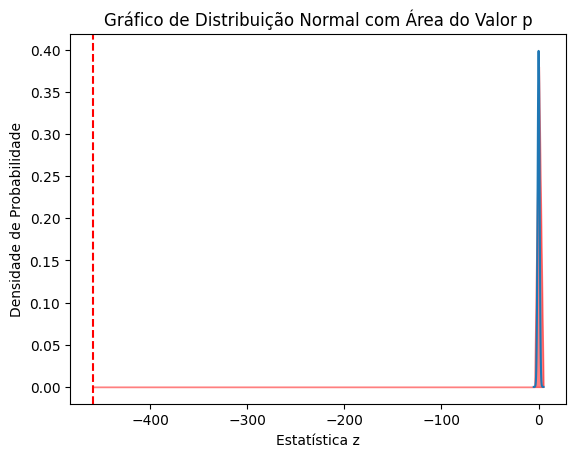

In [72]:
# 10. Criar o gráfico da distribuição normal
x = np.linspace(-5, 5, 100)  # Define um intervalo de valores para o eixo x.
y = norm.pdf(x)  # Calcula a densidade de probabilidade da distribuição normal para cada valor de x.
plt.plot(x, y)  # Plota o gráfico da distribuição normal.

# 11. Marcar a estatística z
plt.axvline(stat, color='red', linestyle='--')  # Adiciona uma linha vertical vermelha tracejada no gráfico para representar a estatística z calculada.

# 12. Sombrear a área do valor p
x_shade = np.linspace(stat, 5, 100)  # Define um intervalo de valores para a área do valor p.
y_shade = norm.pdf(x_shade)  # Calcula a densidade de probabilidade da distribuição normal para cada valor de x_shade.
plt.fill_between(x_shade, y_shade, color='red', alpha=0.5)  # Sombreia a área da distribuição normal à direita da estatística z, que representa a área do valor p.

# 13. Rotular os eixos
plt.xlabel("Estatística z")  # Define o rótulo para o eixo x.
plt.ylabel("Densidade de Probabilidade")  # Define o rótulo para o eixo y.
plt.title("Gráfico de Distribuição Normal com Área do Valor p")  # Define o título do gráfico.
plt.show()  # Exibe o gráfico.

---
# Explicação:

---

* **Criando o Gráfico da Distribuição Normal:**
 * **x = np.linspace(-5, 5, 100)**: Cria um array de 100 valores igualmente espaçados no intervalo de -5 a 5, que representa o eixo x do gráfico da distribuição normal.
 * **y = norm.pdf(x)**: Calcula a densidade de probabilidade da distribuição normal para cada valor de x usando a função norm.pdf.
 * **plt.plot(x, y)**: Plota a distribuição normal usando os valores de x e y.
* **Marcando a Estatística Z:**
 * **plt.axvline(stat, color='red', linestyle='--')**: Adiciona uma linha vertical vermelha tracejada ao gráfico para representar a estatística z calculada pelo teste.
* **Sombreando a Área do Valor P:**
 * **x_shade = np.linspace(stat, 5, 100)**: Cria um array de 100 valores igualmente espaçados no intervalo da estatística z (stat) até 5, que representa a área do valor p no gráfico.
 * **y_shade = norm.pdf(x_shade)**: Calcula a densidade de probabilidade da distribuição normal para cada valor de x_shade.
 * **plt.fill_between(x_shade, y_shade, color='red', alpha=0.5)**: Sombreia a área da distribuição normal à direita da estatística z, que representa a área do valor p.
* **Rotulando os Eixos:**
 * **plt.xlabel("Estatística z")**: Define o rótulo do eixo x como "Estatística z".
 * **plt.ylabel("Densidade de Probabilidade")**: Define o rótulo do eixo y como "Densidade de Probabilidade".
 * **plt.title("Gráfico de Distribuição Normal com Área do Valor p")**: Define o título do gráfico.
* **Exibindo o Gráfico:**
 * **plt.show()**: Exibe o gráfico da distribuição normal.

---


# Glossário com as palavras chaves:


---
* **pandas**: Biblioteca Python para manipulação de dados em formato tabular.
* **statsmodels.stats.proportion**: Submódulo da biblioteca statsmodels para testes estatísticos sobre proporções.
* **scipy.stats**: Submódulo da biblioteca scipy que contém funções estatísticas.
* **matplotlib.pyplot**: Submódulo da biblioteca matplotlib para criar gráficos.
* **pd.read_csv**: Função para ler dados de um arquivo CSV e armazená-los em um DataFrame.
* **proportions_ztest**: Função para realizar o teste z de uma proporção.
* **norm.pdf**: Função para calcular a densidade de probabilidade da distribuição normal.
* **np.linspace**: Função para criar um intervalo de valores.
* **plt.plot**: Função para plotar gráficos.
* **plt.axvline**: Função para adicionar uma linha vertical ao gráfico.
* **plt.fill_between**: Função para sombrear áreas no gráfico.
* **plt.xlabel**: Função para definir o rótulo do eixo x.
* **plt.ylabel**: Função para definir o rótulo do eixo y.
* **plt.title**: Função para definir o título do gráfico.
* **plt.show**: Função para exibir o gráfico.
* **data**: Nome da variável que armazena o DataFrame.
* **df_mulheres**: Nome da variável que armazena o DataFrame com dados de mulheres.
* **x**: Número de mulheres com idade maior que 20 anos.
* **n**: Número total de mulheres.
* **p0**: Proporção populacional sob a hipótese nula.
* **stat**: Estatística z calculada.
* **p_value**: Valor p do teste.
* **nivel_significancia**: Nível de significância para o teste.

---

# Observação:


---
* Se o valor p for menor que o nível de significância, rejeitamos a hipótese nula e concluímos que a proporção de mulheres com idade maior que 20 anos é maior que 50%.

* Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula e não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.

* O gráfico da distribuição normal mostra a área do valor p sombreada, proporcionando uma representação visual da probabilidade de observar os resultados obtidos se a hipótese nula fosse verdadeira.